<a href="https://colab.research.google.com/github/jtunde/Python/blob/main/cn2%20ARIMA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install pmdarima

     |████████████████████████████████| 1.4 MB 4.2 MB/s 
     |████████████████████████████████| 9.8 MB 36.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df = pd.read_csv('drive/MyDrive/data.csv',index_col='TIME',parse_dates=True)
df.index.freq='D'
print(df.index.freq)
print(df.head())

<Day>
               RON
TIME              
2021-01-01  4.9493
2021-01-02  4.9493
2021-01-03  4.9493
2021-01-04  4.8713
2021-01-05  4.8721


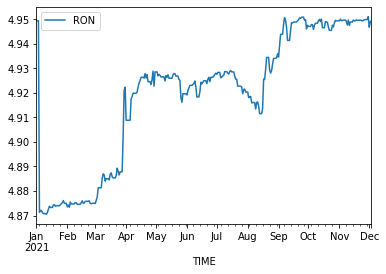

In [10]:
df.plot()

In [11]:
len(df)

337

In [14]:
from pmdarima import auto_arima

In [15]:
stepwise_fit = auto_arima(df['RON'],suppress_warnings=True)           
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  337
Model:               SARIMAX(0, 1, 0)   Log Likelihood                1316.005
Date:                Sun, 02 Jan 2022   AIC                          -2630.009
Time:                        14:11:00   BIC                          -2626.192
Sample:                             0   HQIC                         -2628.488
                                - 337                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.315e-05   1.76e-07    131.472      0.000    2.28e-05    2.35e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):            585072.93
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               0.07   Skew:                           -12.39
Prob(H) (two-sided):                  0.00   Kurtosis:                       205.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
from statsmodels.tsa.arima_model import ARIMA

In [52]:
train = df.iloc[:300]
test = df.iloc[300:]
print(test)

               RON
TIME              
2021-10-28  4.9495
2021-10-29  4.9493
2021-10-30  4.9493
2021-10-31  4.9493
2021-11-01  4.9493
2021-11-02  4.9500
2021-11-03  4.9494
2021-11-04  4.9494
2021-11-05  4.9496
2021-11-06  4.9496
2021-11-07  4.9496
2021-11-08  4.9491
2021-11-09  4.9476
2021-11-10  4.9496
2021-11-11  4.9474
2021-11-12  4.9488
2021-11-13  4.9488
2021-11-14  4.9488
2021-11-15  4.9496
2021-11-16  4.9493
2021-11-17  4.9493
2021-11-18  4.9497
2021-11-19  4.9495
2021-11-20  4.9495
2021-11-21  4.9495
2021-11-22  4.9496
2021-11-23  4.9495
2021-11-24  4.9493
2021-11-25  4.9494
2021-11-26  4.9498
2021-11-27  4.9498
2021-11-28  4.9498
2021-11-29  4.9498
2021-11-30  4.9510
2021-12-01  4.9467
2021-12-02  4.9488
2021-12-03  4.9493


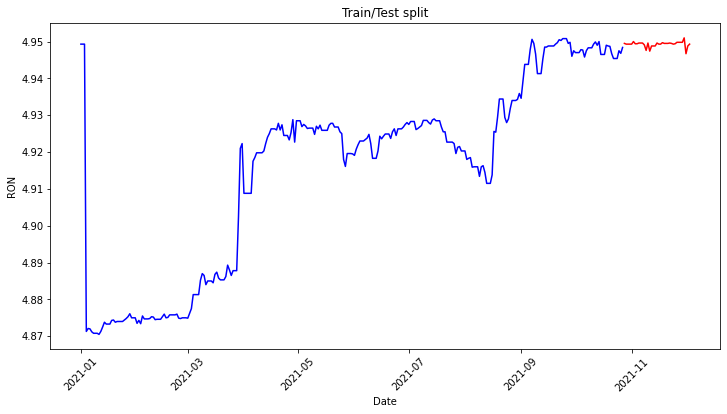

In [53]:
plt.rcParams['figure.figsize'] = (12, 6)
plt.plot(train['RON'], color = "blue")
plt.plot(test['RON'], color = "red")
plt.ylabel('RON')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split")
plt.show()

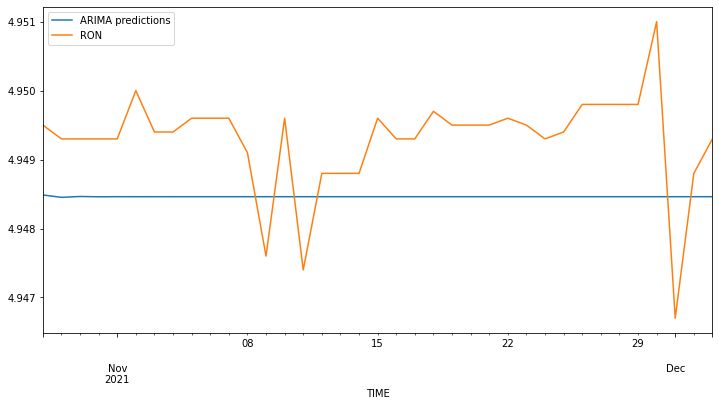

In [100]:
from statsmodels.tsa.arima.model import ARIMA
#model=ARIMA(train['RON'],order=(1,0,5))
model=ARIMA(train['RON'],order=(1,1,2))
model=model.fit()
model.summary()

pred=model.predict(start='2021-10-28',end='2021-12-03',typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
pred.plot(legend=True)
test['RON'].plot(legend=True)

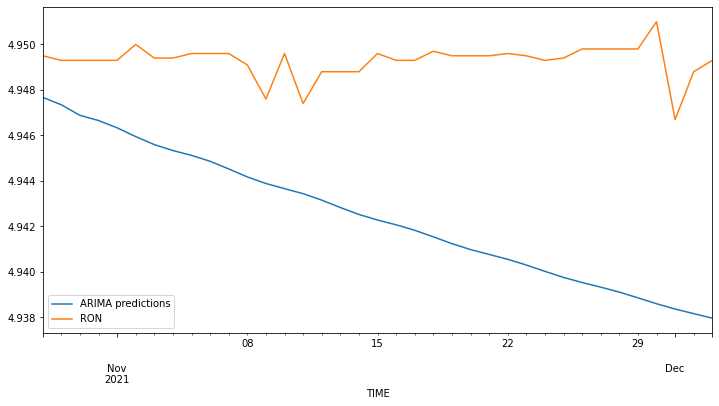

In [71]:
pred=model.predict(start='2021-10-28',end='2021-12-03',typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
pred.plot(legend=True)
test['RON'].plot(legend=True)

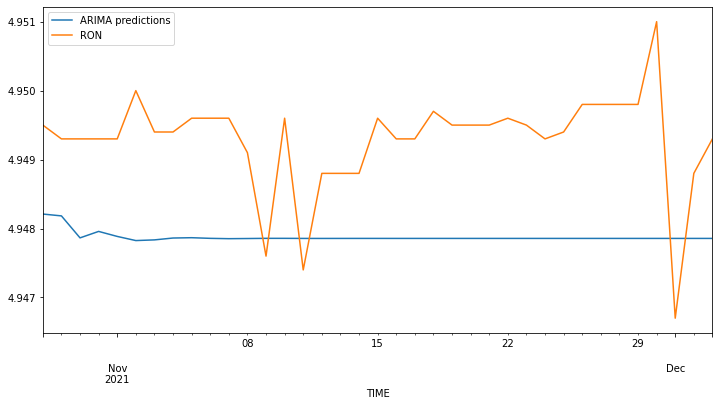

In [67]:
pred.plot(legend='ARIMA Predictions')
test['RON'].plot(legend=True)

In [35]:
test['RON'].mean()

4.948588888888889

In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['RON']))
print(rmse)

0.004849298537249011


In [37]:
model2=ARIMA(df['RON'],order=(1,0,5))
model2=model2.fit()
df.tail()

,RON
TIME,
2021-11-29,4.9498
2021-11-30,4.9510
2021-12-01,4.9467
2021-12-02,4.9488
2021-12-03,4.9493


In [38]:
index_future_dates=pd.date_range(start='2021-12-30',end='2022-01-29')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2021-12-30    4.949604
2021-12-31    4.948947
2022-01-01    4.949311
2022-01-02    4.948976
2022-01-03    4.948805
2022-01-04    4.948697
2022-01-05    4.948590
2022-01-06    4.948484
2022-01-07    4.948379
2022-01-08    4.948274
2022-01-09    4.948169
2022-01-10    4.948066
2022-01-11    4.947963
2022-01-12    4.947860
2022-01-13    4.947758
2022-01-14    4.947657
2022-01-15    4.947557
2022-01-16    4.947457
2022-01-17    4.947357
2022-01-18    4.947259
2022-01-19    4.947161
2022-01-20    4.947063
2022-01-21    4.946966
2022-01-22    4.946870
2022-01-23    4.946774
2022-01-24    4.946679
2022-01-25    4.946584
2022-01-26    4.946490
2022-01-27    4.946397
2022-01-28    4.946304
2022-01-29    4.946211
Freq: D, Name: ARIMA Predictions, dtype: float64


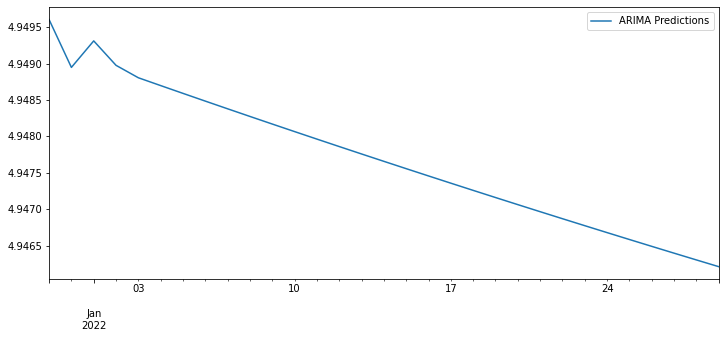

In [39]:
pred.plot(figsize=(12,5),legend=True)